# 0 텍스트 관련 분야


- 텍스트 마이닝
    - 문자로 구성된 데이터에서 가치있는 정보를 얻어내는 과정(인사이트 도출)
    - 주제
        - 워드 카운트, 핵심 키워드 추출, 워드 클라우드(시각화), 유사도 계산을 통한 챗봇(토크나이저의 성능 -> 사전의 성능 -> 많은 양의 텍스트로 훈련, 준비 -> 자본 ... -> 거대 언어 생성 모델)
    - 텍스트를 어떻게 처리해서 수치화 할것인가
        - 토큰화(tokenization)
            - 말뭉치(코퍼스)에서 토큰 단위로 분절(분해)해서 사전을 생성
        - 정제(cleaning)
            - 불용어, 잡음 제거

        

        

- NLP
    - 자연어 처리(Natural Language Processing)
    - 자연어를 컴퓨터가 인지하여서 컴퓨터이 언어 (0,1)로 인지하고 처리하는것
    - 머신러닝/딥러닝 분야에서 진행
    - 텍스트가 데이터이면서 정답이다
    - 분야
        - 기계번역, 감정분석, 키워드 추출, 요약, 글생성, 챗봇...
    - 절차
        - 말뭉치 -> 분절화(토큰화) -> 사전화 -> 백터화 -> 추가작업(원-핫 인코딩 등) -> 압축(임베딩) -> 정규화(필요시) -> 학습 데이터 준비 완료

# 1 토큰화

- 종류
    - 영어권 : NLTK
    - 한국어 : konlpy(코엔앨파이) : https://konlpy.org/ko/latest/index.html
        - 다양한 형태소 분석기
            - Hannanum
            - kkma
            - Mecab(일본 분석기에 한국어 래핑)
            - Okt
        - 형태소 분석기 비교표
            - https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0
- 용어 정리
    - 토큰 : 더이상 나눌 수 없는 단위
        - 토큰을 생성하기 위해서는 형태소 분석기를 이용하여 분절 행위를 수행한다.
    - 토큰화
        - 토큰을 만드는 과정

# 1 매캡 설치

In [4]:
!pip install konlpy

!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.1 MB/s eta 0:00:00
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1934k      0 --:--:-- --:--:-- --:--:-- 1934k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.in
mecab-0.996-ko-0.9.2/man/
mecab-0.996-ko-0.9.2/man/Makefile.am
mecab-0.996-ko-0.9.2/man/mecab.1
mecab-0.996-ko-0.9.2/man/Makefile.in
mecab-0.996-ko-0.9.2/mecab.iss.in
mecab-0.996-ko-0.9.2/config.

# 2 구동테스트

In [9]:
!pip install konlpy

In [14]:
from konlpy.tag import Kkma

In [15]:
# 텍스트 문자
ko_text = "금요일인 25일 오전까지 대부분 지역에서 많은 비가 내릴 것으로 전망된 가운데, 이후엔 남부지방을 중심으로 다시 찜통더위가 나타나겠다."

In [16]:
# 텍스트 문자 => 수치화 => 동사, 명사, 품사, 형용사, ... 나눠야 한다
#  => 분절(형태소 분석기 필요함 -> konlpy, Mecab 설치한 이유)
tokenizer = Kkma()
tokenizer.morphs(ko_text)

['금요일',
 '이',
 'ㄴ',
 '25',
 '일',
 '오전',
 '까지',
 '대부분',
 '지역',
 '에서',
 '많',
 '은',
 '비가',
 '내리',
 'ㄹ',
 '것',
 '으로',
 '전망',
 '되',
 'ㄴ',
 '가운데',
 ',',
 '이후',
 '에',
 '는',
 '남부',
 '지방',
 '을',
 '중심',
 '으로',
 '다시',
 '찜통',
 '더위',
 '가',
 '나타나',
 '겠',
 '다',
 '.']

In [13]:
print(tokenizer.morphs(ko_text))
# 문자열이 백터화되어 있음

['금요일', '이', 'ㄴ', '25', '일', '오전', '까지', '대부분', '지역', '에서', '많', '은', '비가', '내리', 'ㄹ', '것', '으로', '전망', '되', 'ㄴ', '가운데', ',', '이후', '에', '는', '남부', '지방', '을', '중심', '으로', '다시', '찜통', '더위', '가', '나타나', '겠', '다', '.']


#3 Raw Data 준비 (말뭉치, 코퍼스)

In [1]:
!pip install Korpora

In [17]:
from Korpora import Korpora
Korpora.corpus_list()

{'kcbert': 'beomi@github 님이 만드신 KcBERT 학습데이터',
 'korean_chatbot_data': 'songys@github 님이 만드신 챗봇 문답 데이터',
 'korean_hate_speech': '{inmoonlight,warnikchow,beomi}@github 님이 만드신 혐오댓글데이터',
 'korean_parallel_koen_news': 'jungyeul@github 님이 만드신 병렬 말뭉치',
 'korean_petitions': 'lovit@github 님이 만드신 2017.08 ~ 2019.03 청와대 청원데이터',
 'kornli': 'KakaoBrain 에서 제공하는 Natural Language Inference (NLI) 데이터',
 'korsts': 'KakaoBrain 에서 제공하는 Semantic Textual Similarity (STS) 데이터',
 'kowikitext': 'lovit@github 님이 만드신 wikitext 형식의 한국어 위키피디아 데이터',
 'namuwikitext': 'lovit@github 님이 만드신 wikitext 형식의 나무위키 데이터',
 'naver_changwon_ner': '네이버 + 창원대 NER shared task data',
 'nsmc': 'e9t@github 님이 만드신 Naver sentiment movie corpus v1.0',
 'question_pair': 'songys@github 님이 만드신 질문쌍(Paired Question v.2)',
 'modu_news': '국립국어원에서 만든 모두의 말뭉치: 뉴스 말뭉치',
 'modu_messenger': '국립국어원에서 만든 모두의 말뭉치: 메신저 말뭉치',
 'modu_mp': '국립국어원에서 만든 모두의 말뭉치: 형태 분석 말뭉치',
 'modu_ne': '국립국어원에서 만든 모두의 말뭉치: 개체명 분석 말뭉치',
 'modu_spoken': '국립국어원에서 만든 모두의 말뭉치: 구어 

In [18]:
# 네이버 영화 리뷰 말뭉치 다운로드
review_corpus = Korpora.load('nsmc')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `nsmc` is already installed at /root/Korpora/nsmc/ratings_train.txt
[Korpora] Corpus `nsmc` is already installed at /root/Korpora/nsmc/ra

In [19]:
review_corpus.train

NSMC.train: size=150000
  - NSMC.train.texts : list[str]
  - NSMC.train.labels : list[int]

In [8]:
review_corpus.train[0].text, review_corpus.train[0].text

('아 더빙.. 진짜 짜증나네요 목소리', '아 더빙.. 진짜 짜증나네요 목소리')

In [20]:
# df로 구성
import pandas as pd

review_corpus_df = pd.DataFrame()

In [21]:
review_corpus_df['doc'] = review_corpus.train.get_all_texts()
review_corpus_df['label'] = review_corpus.train.get_all_labels()
review_corpus_df.head(2)
# 리뷰 1500개, 긍부정 값 (0,1)

,doc,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1


# 4 코랩에서 한글 폰트 처리
- 리눅스에 한글 폰트 설치

In [13]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'NanumBarunGothic')

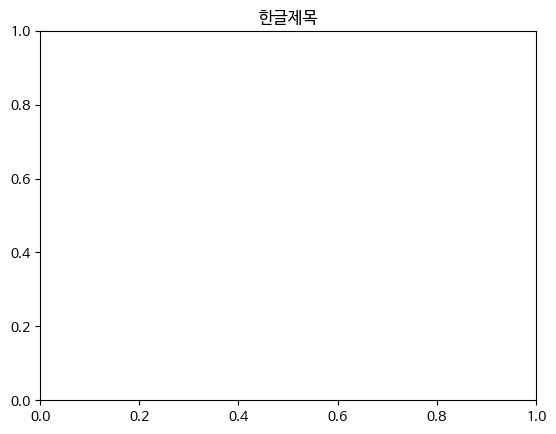

In [3]:
plt.title('한글제목')
plt.show()

# 5 워드클라우드

In [4]:
!pip install wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
# 이미지 위에서 워드클라우드 진행 => 특정 형태 지원
from PIL import Image

In [7]:
heart_mask = np.array(Image.open('/content/drive/MyDrive/ASAC/Python 데이터분석/EDA/heart.jpg'))

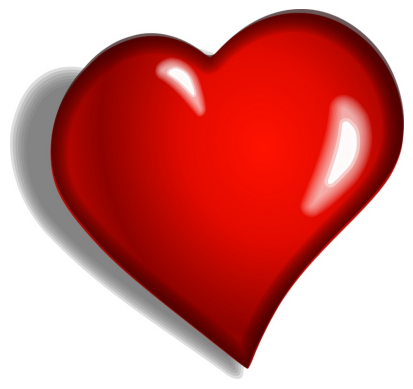

In [10]:
# 이미지 확인
plt.imshow(heart_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [11]:
# 불용어 => 워드클라우드 상에서 배제할 텍스트 지정
stopwords = set(STOPWORDS)

# 추가
stopwords.add('제외하고싶은단어추가')

In [13]:
# 워드 클라우드 생성 -> 특정 말뭉치에서 개별 단어 생성
# 빈도가 높은순으로 정렬 -> 구름 모양으로 뭉쳐서 표현 -> 빈도가 높으면 글자크기도 커진다.
# 문장의 핵심어를 빈도를 통해 계산해서 시각화 하는 도구
wc = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 폰트지정
    , max_words = 300 # 빈도 서열
    , stopwords = stopwords # 불용어 추가
    , mask = heart_mask # 생략되면 사각형 틀에서 표시
    , background_color = 'white' # 배경색
)

In [23]:
# 텍스트
all_text = ' '.join(review_corpus_df['doc'].values)
len(all_text)

5435608

In [25]:
# wc에 말뭉치 주입 -> 토크나이징하고 -> count -> 정렬 -> 준비
wc_gen = wc.generate(all_text)

In [26]:
# 빈도 서열
wc_gen.words_

{'영화': 1.0,
 '정말': 0.825988187187642,
 '진짜': 0.7560199909132213,
 '너무': 0.6622747236104801,
 '그냥': 0.4540360442223232,
 'ㅋㅋ': 0.3501438739966682,
 '다': 0.31409965167348175,
 '더': 0.2928971679539603,
 '좀': 0.2915341511434197,
 '그리고': 0.26881720430107525,
 '그': 0.2659397243677116,
 '왜': 0.24791761320611844,
 '완전': 0.23686203240951084,
 '참': 0.22353475692866878,
 '아': 0.22035438437074056,
 '이런': 0.22020293805845828,
 '이': 0.2155081023777071,
 '내가': 0.21081326669695594,
 '역시': 0.20733000151446312,
 'ㅋㅋㅋ': 0.20324095108284113,
 'ㅠㅠ': 0.19915190065121915,
 '드라마': 0.1973345449038316,
 '이거': 0.19248826291079812,
 'ㅋ': 0.19051946085112828,
 '이렇게': 0.18870210510374072,
 '최고': 0.18309859154929578,
 '영화는': 0.17219445706497047,
 '난': 0.171437225503559,
 '평점': 0.17022565500530062,
 '영화가': 0.1667423898228078,
 'ㅡㅡ': 0.16643949719824322,
 '이게': 0.15674693321217628,
 '이건': 0.1561411479630471,
 '스토리': 0.15447523852794184,
 '보고': 0.15205209753142512,
 'ㅎㅎ': 0.1519006512191428,
 '없다': 0.13933060729971225,

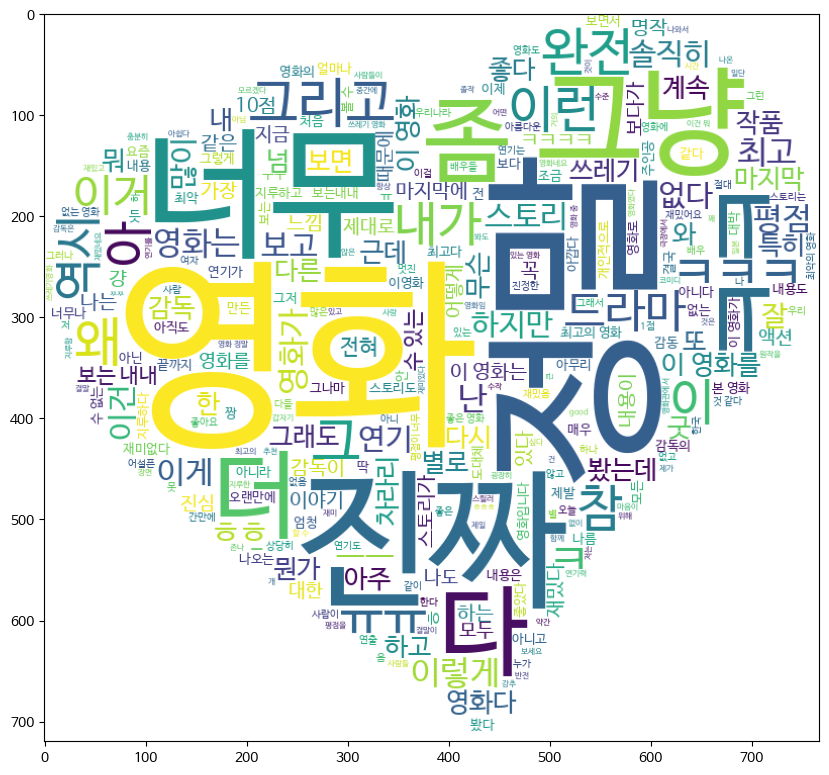

In [27]:
plt.figure(figsize = (10,10))
plt.imshow(wc_gen)